In [1]:
from estates import Cortijo
from structures import Building
from zones import Room
from helper import GeoPoint

from grapher import Graph
from ressources_finance import Cost
from storage import create_file, save_object, load_object

### set data directory and filename

In [2]:
# set project dir and name
project_dir = 'data/'
filename = 'LosCigarrones_v1'
full_path = create_file(project_dir, filename)


### First we want to define main aspects of the Cortijo:
- name
- buying price
- land size
- location
- elevation

In [3]:
cortijo = Cortijo()
cortijo.name = 'Los Cigarrones, Orgiva'
cortijo.landSize = 1900        # m^2
cortijo.location = GeoPoint(
    36.886978,                 # latitude
    -3.379498,                 # longitude
    400)                       # elevation



In [4]:
# adding costs
cortijo.add_cost('fixed', 'purchase', 75000)     # €

In [5]:
cortijo.display()
cortijo.display_missing()

name: Los Cigarrones, Orgiva
children:
cost:
    fixed: {'purchase': 75000}€
landSize: 1900
location: 36.886978,-3.379498,400




'These values are not set: children'

### Now define the structures: 2 houses
- a stone house, and
- a ruin

In [6]:
stoneHouse = Building()
stoneHouse.name = 'stoneHouse'
stoneHouse.houseSize = 54 # m^2
stoneHouse.add_child('rooms', [
    Room('kitchen'),
    Room('living room'),
    Room('private bedroom')
])


ruin = Building()
ruin.name = 'ruin guest house'
ruin.houseSize = 38 # m^2
ruin.add_child('rooms', [
    Room('guest bedroom 1'),
    Room('guest bedroom 2')
])


In [7]:
# adding costs
stoneHouse.add_cost( 'fixed', 'restoration', 5000)
ruin.add_cost('fixed', 'restoration', 20000)

In [8]:
stoneHouse.display()
stoneHouse.display_missing()

name: stoneHouse
children:
    rooms:
        kitchen
        living room
        private bedroom
cost:
    fixed: {'restoration': 5000}€
houseSize: 54




'All values are set.'

In [9]:
ruin.display()
ruin.display_missing()

name: ruin guest house
children:
    rooms:
        guest bedroom 1
        guest bedroom 2
cost:
    fixed: {'restoration': 20000}€
houseSize: 38




'All values are set.'

## Add the buildings to the cortijo

In [10]:
cortijo.add_child('structures', [stoneHouse, ruin])

In [11]:
cortijo.display()
cortijo.display_missing()

name: Los Cigarrones, Orgiva
children:
    structures:
        stoneHouse
        ruin guest house
cost:
    fixed: {'purchase': 75000}€
landSize: 1900
location: 36.886978,-3.379498,400




'All values are set.'

### Generate graph network

In [12]:
graph_cortijo = Graph(cortijo)

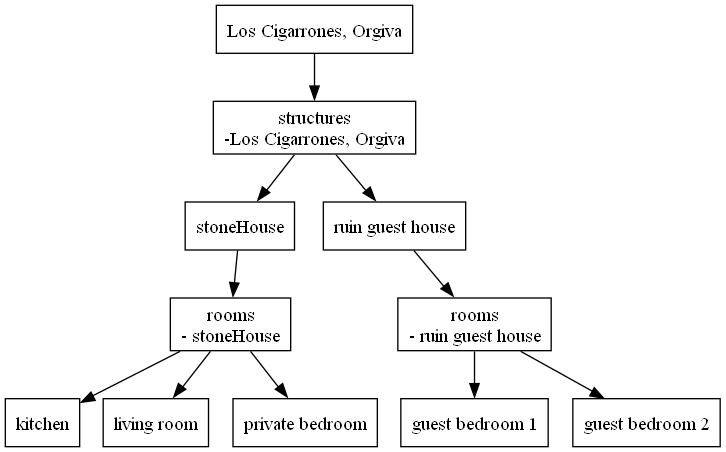

In [13]:
graph_cortijo.draw_graph(full_path, save=1)

### Save the project

In [14]:
save_object(cortijo, "data.pkl", full_path)